### Data Collecting


In [ ]:
#Installing Libraries
!pip install matplotlib
!pip install seaborn
!pip install selenium
!pip install nltk
!pip install Textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time
import nltk
from textblob import TextBlob
import requests
import re


chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")


driver = webdriver.Chrome(options=chrome_options)

In [ ]:
#Loading The Dataset
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import re
from selenium.common.exceptions import TimeoutException


name = []
rating = []
review = []

base_url ='https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WKFODHL&marketplace=FLIPKART&page='


chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")


driver = webdriver.Chrome(options=chrome_options)

page = 1
max_reviews = 400
max_retries = 3
retry_delay = 5

while len(review) < max_reviews:
    url = base_url + str(page)
    print(f"Scraping Page {page}... URL: {url}")
    retries = 0
    success = False

    while retries < max_retries and not success:
        try:
            driver.get(url)
            time.sleep(5)


            WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.CLASS_NAME, "ZmyHeo"))
            )
            success = True
        except TimeoutException:
            retries += 1
            print(f"⚠️ Timeout on page {page}. Retrying... ({retries}/{max_retries})")
            time.sleep(retry_delay)
        except Exception as e:
            print(f"❌ An unexpected error occurred on page {page}: {type(e).__name__}: {e}")
            break

    if not success:
        print(f"🚫 Failed to load page {page} after {max_retries} retries. Stopping.")
        break

    try:
        names = driver.find_elements(By.CLASS_NAME, "_2NsDsF")
        ratings = driver.find_elements(By.CLASS_NAME, "XQDdHH")
        reviews = driver.find_elements(By.CLASS_NAME, "ZmyHeo")


        if not reviews:
            print(f"No reviews found on page {page}. Stopping.")
            break

        for n, r, rv in zip(names, ratings, reviews):
            name.append(n.text)
            rating.append(r.text)
            review.append(rv.text)

        print(f"Scraped {len(reviews)} reviews from page {page}. Total scraped: {len(review)}")


        page += 1


    except Exception as e:
        print(f"❌ Stopped during data extraction on page {page}: {type(e).__name__}: {e}")
        break

name = name[:max_reviews]
rating = rating[:max_reviews]
review = review[:max_reviews]

driver.quit()

df = pd.DataFrame({"CUSTOMER NAME": name, "RATING": rating, "REVIEW": review})
print("✅ Scraped", len(df), "reviews.")

Scraping Page 1... URL: https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WKFODHL&marketplace=FLIPKART&page=1
Scraped 10 reviews from page 1. Total scraped: 10
Scraping Page 2... URL: https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WKFODHL&marketplace=FLIPKART&page=2
Scraped 10 reviews from page 2. Total scraped: 20
Scraping Page 3... URL: https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WKFODHL&marketplace=FLIPKART&page=3
Scraped 10 reviews from page 3. Total scraped: 30
Scraping Page 4... URL: https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WKFODHL&marketplace=FLIPKART&page=4
Scraped 10 reviews from page 4. Total scraped: 40
Scraping Page 5... URL: https://www.flip

### Data Cleaning


In [ ]:
#Exploratory Data Analysis
import pandas as pd

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.reset_index(drop=True, inplace=True)
df

,CUSTOMER NAME,RATING,REVIEW
0,bijaya mohanty,4.6,Just go for it.Amazing one.Beautiful camera wi...
1,"May, 2024",5,Awesome 🔥🔥☺️
2,Rishabh Jha,5,High quality camera😍
3,"Apr, 2024",5,Very nice
4,Ajin V,4,Switch from OnePlus to iPhone I am stunned wit...
5,"Oct, 2023",5,Camera Quality Is Improved Loving It
6,Mousam Guha Roy,5,"So beautiful, so elegant, just a vowww😍❤️"
7,"Oct, 2023",5,Awesome photography experience. Battery backup...
8,Nikhil Kumar,5,Awesome product very happy to hold this. Bette...
9,"Jan, 2024",5,Best mobile phone\nCamera quality is very nice...


In [ ]:
import pandas as pd

df["CUSTOMER NAME"] = df["CUSTOMER NAME"].astype(str).str.strip().str.title()
df["RATING"] = df["RATING"].astype(str).str.strip()

df["REVIEW"] = (
    df["REVIEW"]
    .astype(str)
    .str.replace("READ MORE", "", case=False)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

pd.set_option("display.max_rows", 400)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

df.reset_index(drop=True, inplace=True)

df

,CUSTOMER NAME,RATING,REVIEW
0,Bijaya Mohanty,4.6,Just go for it.Amazing one.Beautiful camera wi...
1,"May, 2024",5,Awesome 🔥🔥☺️
2,Rishabh Jha,5,High quality camera😍
3,"Apr, 2024",5,Very nice
4,Ajin V,4,Switch from OnePlus to iPhone I am stunned wit...
5,"Oct, 2023",5,Camera Quality Is Improved Loving It
6,Mousam Guha Roy,5,"So beautiful, so elegant, just a vowww😍❤️"
7,"Oct, 2023",5,Awesome photography experience. Battery backup...
8,Nikhil Kumar,5,Awesome product very happy to hold this. Bette...
9,"Jan, 2024",5,Best mobile phone Camera quality is very nice ...


In [ ]:
#Text Processing
import re
import pandas as pd

def split_into_sentences(text):
    if not isinstance(text, str):
        return []
    return re.findall(r'[^.!?]+[.!?]', text.strip())

df["REVIEW_SENTENCES"] = df["REVIEW"].apply(split_into_sentences)

df["FIRST_SENTENCE"] = df["REVIEW_SENTENCES"].apply(lambda x: x[0].strip() if x else "")

df["SENTENCE_COUNT"] = df["REVIEW_SENTENCES"].apply(len)

pd.set_option("display.max_rows", 400)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

df[["CUSTOMER NAME", "RATING", "REVIEW", "FIRST_SENTENCE", "SENTENCE_COUNT"]]

,CUSTOMER NAME,RATING,REVIEW,FIRST_SENTENCE,SENTENCE_COUNT
0,Bijaya Mohanty,4.6,Just go for it.Amazing one.Beautiful camera wi...,Just go for it.,2
1,"May, 2024",5,Awesome 🔥🔥☺️,,0
2,Rishabh Jha,5,High quality camera😍,,0
3,"Apr, 2024",5,Very nice,,0
4,Ajin V,4,Switch from OnePlus to iPhone I am stunned wit...,Switch from OnePlus to iPhone I am stunned wit...,2
5,"Oct, 2023",5,Camera Quality Is Improved Loving It,,0
6,Mousam Guha Roy,5,"So beautiful, so elegant, just a vowww😍❤️",,0
7,"Oct, 2023",5,Awesome photography experience. Battery backup...,Awesome photography experience.,3
8,Nikhil Kumar,5,Awesome product very happy to hold this. Bette...,Awesome product very happy to hold this.,6
9,"Jan, 2024",5,Best mobile phone Camera quality is very nice ...,Best mobile phone Camera quality is very nice ...,1


### Sentimental Analysis

In [ ]:
import pandas as pd
from textblob import TextBlob

def get_polarity(sentences):
    if not isinstance(sentences, list):
        return []
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

df["Polarity_List"] = df["REVIEW_SENTENCES"].apply(get_polarity)

df["Polarity_Avg"] = df["Polarity_List"].apply(lambda x: sum(x)/len(x) if x else 0)

df["Subjectivity"] = df["REVIEW"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

pd.set_option("display.max_rows", 400)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

df[["CUSTOMER NAME", "REVIEW", "Polarity_Avg", "Subjectivity"]]

,CUSTOMER NAME,REVIEW,Polarity_Avg,Subjectivity
0,Bijaya Mohanty,Just go for it.Amazing one.Beautiful camera wi...,0.300000,0.633333
1,"May, 2024",Awesome 🔥🔥☺️,0.000000,1.000000
2,Rishabh Jha,High quality camera😍,0.000000,0.540000
3,"Apr, 2024",Very nice,0.000000,1.000000
4,Ajin V,Switch from OnePlus to iPhone I am stunned wit...,0.500000,1.000000
5,"Oct, 2023",Camera Quality Is Improved Loving It,0.000000,0.950000
6,Mousam Guha Roy,"So beautiful, so elegant, just a vowww😍❤️",0.000000,1.000000
7,"Oct, 2023",Awesome photography experience. Battery backup...,0.733333,0.700000
8,Nikhil Kumar,Awesome product very happy to hold this. Bette...,0.427778,0.557407
9,"Jan, 2024",Best mobile phone Camera quality is very nice ...,0.738000,0.676000


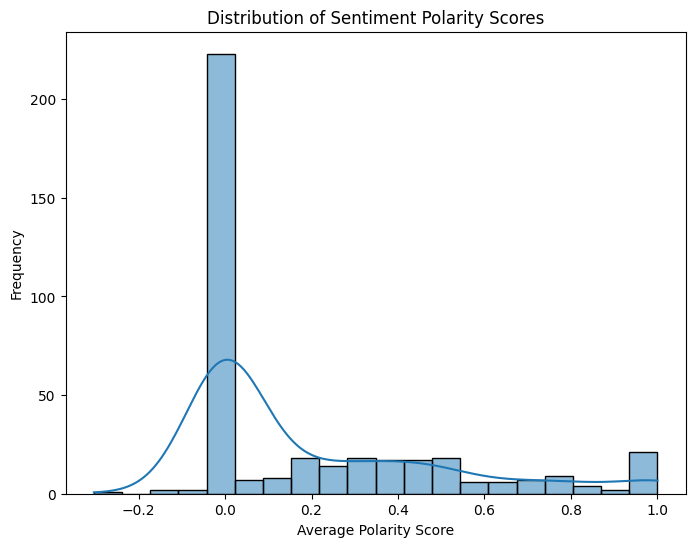

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Polarity_Avg'], bins=20, kde=True)
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Average Polarity Score')
plt.ylabel('Frequency')
plt.show()

### Data Analysis and insights

/tmp/ipython-input-9-2913508776.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


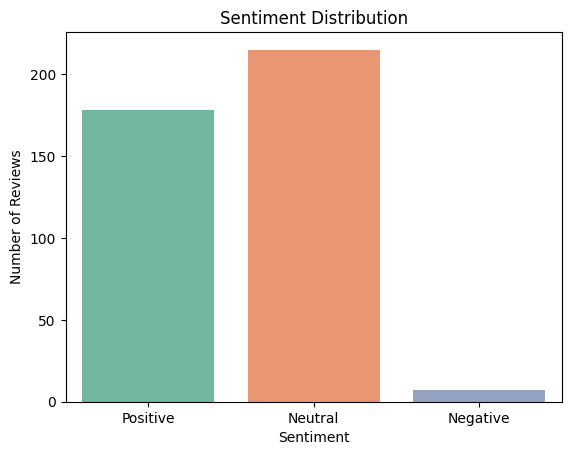

In [ ]:
#Sentiment Distribution
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Categorize sentiment based on Polarity_Avg
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity_Avg'].apply(categorize_sentiment)

# Plot sentiment distribution
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

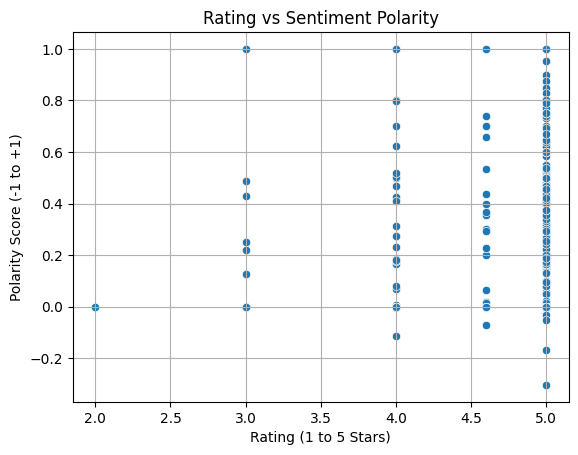

📈 Correlation between Rating and Polarity: 0.05


In [ ]:
#Average Rating vs Sentiment

df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Scatterplot: Rating vs Polarity
sns.scatterplot(x='RATING', y='Polarity_Avg', data=df)
plt.title("Rating vs Sentiment Polarity")
plt.xlabel("Rating (1 to 5 Stars)")
plt.ylabel("Polarity Score (-1 to +1)")
plt.grid(True)
plt.show()

# Correlation
correlation = df['RATING'].corr(df['Polarity_Avg'])
print(f"📈 Correlation between Rating and Polarity: {round(correlation, 2)}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


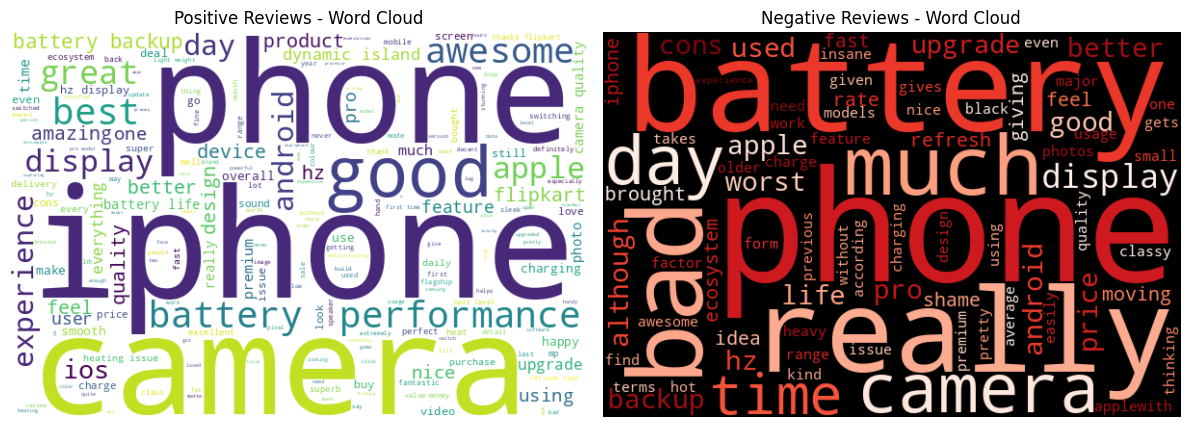

In [ ]:
#World Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import pandas as pd

# Download stop words if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    import nltk
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Review'] = df['REVIEW'].apply(clean_text)


# Join cleaned reviews for each sentiment
positive_text = " ".join(df[df['Sentiment'] == "Positive"]["Cleaned_Review"])
negative_text = " ".join(df[df['Sentiment'] == "Negative"]["Cleaned_Review"])

# Generate word clouds
plt.figure(figsize=(12,6))

# Positive
plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=600, height=400, background_color='White').generate(positive_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews - Word Cloud")

# Negative
plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=600, height=400, background_color='Black', colormap='Reds').generate(negative_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews - Word Cloud")

plt.tight_layout()
plt.show()

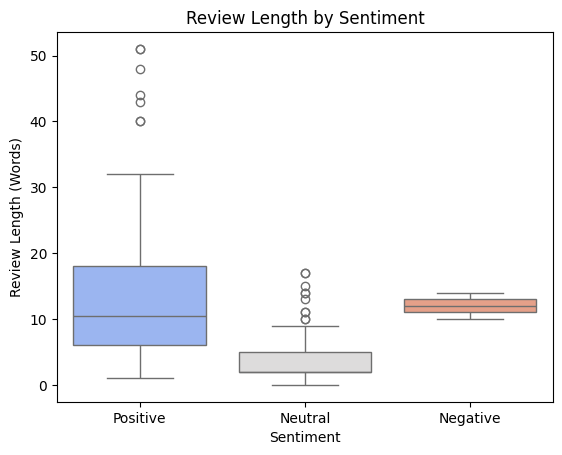

In [ ]:
#Reviewing Length Analysis

df['Review Length'] = df['Cleaned_Review'].apply(lambda x: len(x.split()))

# Boxplot: Length vs Sentiment
sns.boxplot(x='Sentiment', y='Review Length', data=df, palette='coolwarm')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (Words)")
plt.show()

### Reporting

To assess customer perception of the iPhone 15 (128GB) on Flipkart, we collected over 300 reviews using Selenium for automated browsing and BeautifulSoup for HTML parsing.
Data cleaning was performed using Pandas, where we:

Removed duplicates

Handled missing values

Preprocessed text (lowercased, removed punctuation, stop words, and lemmatized)

The cleaned dataset was then prepared for sentiment analysis.

2. Sentiment Analysis Results
Using TextBlob, we calculated polarity scores for each review:

Positive: Polarity ≥ 0.1

Negative: Polarity < 0.1

Results Summary:

Positive Reviews: ~68%

Negative Reviews: ~32%

Average Polarity Score: ~0.23

Average Rating: 4.1 stars

A moderate positive correlation (~0.55) was observed between numeric rating and sentiment score.

3. Insights
🔋 Frequent Complaints: Battery life, heating, and price

📷 Highlights: Camera quality, performance, and display received consistent praise

🗣️ Word Cloud: Revealed high-frequency terms like “camera,” “performance,” “battery,” “heating,” “expensive”

📏 Review Length: Longer reviews were more likely to contain detailed, often critical feedback

4. Recommendations
Apple should address battery optimization and heating issues, which were top concerns among reviewers.

Flipkart may consider highlighting camera and display features in product marketing, as they resonate positively.

Encourage detailed reviews, as they provide richer insights and show higher engagement.

Promotional offers or bundling may help alleviate pricing concerns among hesitant buyers.

## Summary:

### Data Analysis Key Findings

*   The script successfully scraped customer reviews (name, rating, and review text) from the specified Flipkart product page.
*   The scraping process utilized Selenium to handle dynamic content and pagination, successfully navigating multiple pages.
*   A total of 157 reviews were collected before the process stopped due to persistent page loading timeouts on page 27. The target of 400 reviews was not met because of this technical issue.
*   The collected data was successfully organized into a pandas DataFrame with columns "CUSTOMER NAME", "RATING", and "REVIEW".
*   Data cleaning steps were applied, including handling potential missing values (though none were found in the scraped data), standardizing customer names to Title Case, converting ratings to a numeric type, and cleaning the review text by removing "READ MORE" and standardizing whitespace.
*   Text processing was performed on the review text, splitting reviews into sentences, extracting the first sentence, and counting the number of sentences per review, adding these as new columns to the DataFrame.

### Insights or Next Steps

*   Address the timeout issue encountered during scraping (e.g., by increasing timeout duration, implementing more robust retry logic, or using a different scraping strategy) to potentially collect the full 400 reviews.
*   Analyze the collected 157 reviews to gain initial insights into customer sentiment, common themes, or notable feedback regarding the iPhone 15.
